In [354]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits import mplot3d

%matplotlib inline

In [355]:
Mo_ka = (275, 17444.3)
Mo_kb = (309, 19608.3)
W_ka2 = (913, 57981.7)
W_ka1 = (934, 59318.24)
W_kb = (1058, 67244.3)

In [356]:
#Make a dataframe from the sample directory. Good to visualize data. You should 
#feed this dataframe to another function that will make an array of objects

def gen_spec_df(folder_dir, meta_dic):
    
    #initialize a df of the CSV sample/scan info.
    #This should probably be something I iron out with path (it'd be a '\' on PC) but it's fine for now
    raw_df = pd.read_csv(folder_dir + "/" + meta_dic)
    
    #get the hdf filename for every file in the directory
    files = []
    for x in os.listdir(folder_dir):
        if x.endswith(".hdf5"):
            files.append(x)
    
    #Add a column for filename in meta_df that is the same length of the meta_df
    edxname = [''] * len(raw_df.index)
    raw_df['FileName'] = edxname
    
    #Find each file in the meta_df by comparing scan number. Add file name 
    for y in range(len(files)):
        hdf_file = h5py.File(directory + files[y], 'r')
        for z in range(len(raw_df.index)):
            if raw_df['ScanNum'].values[z] == hdf_file.attrs['Scan Number']:
                raw_df['FileName'].values[z] = directory+files[y]
    
    #Add a column for EDX data arrays
    edxd = [''] * len(raw_df.index)
    raw_df['Spectra'] = edxd
    raw_df['Position'] = edxd
    
    #Scan through filenames and add position and spectra data arrays to df
    #If there's none, set those values equal to some string or warning
    for h in range(len(raw_df.index)):
        datahdf = h5py.File(raw_df['FileName'].values[h], 'r')
        positionflag = 'No Position Data (uh oh)'
        spectraflag = 'No Spectra Data (uh oh)'
        with h5py.File(raw_df['FileName'].values[h], 'r') as f:
            for x in range(len(f.keys())):
                if list(f.keys())[x] == '7bmb1:aero:m2.VAL':
                    raw_df['Position'].values[h] = f['7bmb1:aero:m2.VAL'][...]
                    positionflag = 'yep'
                if list(f.keys())[x] == 'dxpMercury:mca1.VAL':
                    raw_df['Spectra'].values[h] = f['dxpMercury:mca1.VAL'][...]
                    spectraflag = 'yep'
        if positionflag != 'yep':
            raw_df['Position'].values[h] = []
        if spectraflag != 'yep':
            raw_df['Spectra'].values[h] = []

    return raw_df


In [357]:
#given x as a single float, int, or list; and a set of polynomial coeffecients, calculate and return the
#poly fit at the given x or list of converted values. Used to convert bin scale to energy

def poly_function(x, coeff):
    order = len(coeff) - 1
    pows = []
    for q in range(order + 1):
        pows.append(order - q)
    if type(x) == int or type(x) == float:
        y = 0
        for r in range(len(pows)):
            y = y + coeff[r] * np.power(x, pows[r])
        return y
    elif type(x) == list and (type(x[0]) == int or type(x[0]) == float):
        y_poly = []
        for s in range(len(x)):
            y = 0
            for t in range(len(pows)):
                y = y + coeff[t] * np.power(x[s], pows[t])
            y_poly.append(y/1000) 
        return y_poly
    else: return print('Error: Expected int, float, or list')

In [358]:
directory = '/Users/anthonygironda/Documents/MDA_Scans_Seidler/'
meta = '7bmb1_10.19.22_EDXindex.csv'

sample_df = gen_spec_df(directory, meta)
sample_df.tail()
# display(sample_df)

,ScanNum,FullName,pH,Days,Temperature,Atmosphere,SteelFiber,Aborted,Notes,Start (mm),End (mm),Step Size (mm),Slit Entrance (um),Scan Time,Rotation Speed (deg/s),FileName,Spectra,Position
38,1104,High pH BL 60C 4d,High,4.0,60.0,100% CO2,False,False,NaN,13.0,6.0,0.25,100.0,20.0,18.0,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 1027.0, 1265.0, 1379.0, 1566.0, 1662.0,...","[-13.0, -12.75, -12.5, -12.25, -12.0, -11.75, ..."
39,1105,High pH BL 60C 2d,High,2.0,60.0,100% CO2,False,False,NaN,13.0,6.0,0.25,100.0,20.0,18.0,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 1079.0, 1226.0, 1443.0, 1651.0, 1690.0,...","[-13.0, -12.75, -12.5, -12.25, -12.0, -11.75, ..."
40,1106,High pH BL 25C 14d,High,14.0,25.0,100% CO2,False,False,NaN,13.0,6.0,0.25,100.0,20.0,18.0,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 1132.0, 1313.0, 1520.0, 1723.0, 1748.0,...","[-13.0, -12.75, -12.5, -12.25, -12.0, -11.75, ..."
41,1107,High pH BL 25C 4d,High,4.0,25.0,100% CO2,False,False,NaN,13.0,6.0,0.25,100.0,20.0,18.0,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 1085.0, 1252.0, 1458.0, 1690.0, 1811.0,...","[-13.0, -12.75, -12.5, -12.25, -12.0, -11.75, ..."
42,1108,High pH BL Ref,High,0.0,25.0,100% CO2,False,False,NaN,13.0,6.0,0.25,100.0,20.0,18.0,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 1058.0, 1208.0, 1470.0, 1605.0, 1803.0,...","[-13.0, -12.75, -12.5, -12.25, -12.0, -11.75, ..."


In [381]:
class scan:
        
    def __init__(self, spectra, position_from_center):
        self.spectra = spectra
        self.beam_position = position_from_center
        self.cal_fit_order = 3
        self.cal_feat = [Mo_ka, Mo_kb, W_ka2, W_ka1, W_kb]
        self.bins = list(range(len(self.spectra)))

    def set_cal_features(self, list_of_tup): self.cal_feat = list_of_tup
    def set_cal_order(self, n): self.cal_fit_order = n
    
    def get_cal_features(self): return self.cal_feat
    def get_cal_order(self): return self.cal_fit_order
    def get_bins(self): return self.bins
    def get_position(self): return self.beam_position
    def get_spectrum(self): return self.spectra
    def get_coeff(self): return np.polyfit([i[0] for i in self.cal_feat], [i[1] for i in self.cal_feat], self.cal_fit_order)
    def get_energy(self): return poly_function(self.bins, self.get_coeff())

    def conv_bins_to_energy(self, bin_array): return poly_function(bin_array, self.get_coeff())
    
    def quick_plot(self, energy_bool):
        #Plot by energy [keV]
        if energy_bool == True:
            spec_data = self.spectra
            x_data_kev = self.get_energy()
            fig, ax = plt.subplots(figsize = (10,6))
            ax.plot(x_data_kev, spec_data)
            ax.set_xlabel('Energy [keV]')
            ax.set_ylabel('Counts')
            ax.grid(True)
        #Plot by bins
        else:
            spec_data = self.spectra
            x_dat = self.get_bins()
            fig, ax = plt.subplots(figsize = (10,6))
            ax.plot(x_dat, spec_data, linewidth=2.0)
            ax.set_xlabel('Bins')
            ax.set_ylabel('Counts')
            ax.grid(True)
        return (fig, ax)


In [382]:
#When bool_pos_given_as_index is True, the pos instantiation variable is an index. Otherwise, when false,
#the pos instantiation variable is an actual position value, like -13.0 or 6.75. It also catches
#an edge case when the position array is empty, such as the calibration scan 1069. Things may behave funny when
#position arrays end in duplicates of 0s or any duplicates in general

#There's potentially a problem for if the spectra passed to the scan is a list or a numpy array, be aware.
def scan_instant_helper(df, scannum, pos, bool_pos_given_as_index):
    errorflag = True
    pos_i = None
    scan_index = (df[df['ScanNum']==scannum].index.values)[0]
    pos_array = df['Position'][scan_index]
    
    #edge case checker, if the position array of a given scan number is empty
    if ((pos == 0) and len(pos_array)==0):
        spectra_set = df['Spectra'][scan_index]
        spectra = spectra_set
        return scan(spectra, None)

    #If the bool is given as true, treat the pos variable like an index and not a value
    #Check first that the pos as an index is within the range of the scan's position array
    if bool_pos_given_as_index == True:
        if pos > (len(pos_array)-1): 
            return print('ERROR: Index is out of range of position array')
        else:
            pos_i = pos
            pos_value = abs(df['Position'][scan_index][pos_i])
            spectra_set = df['Spectra'][scan_index]
            spectra = spectra_set[pos_i]
            return scan(spectra, pos_value)
    
    #Otherwise, the bool was false and the pos variable was given as an actual position in the array
    #Check first that the pos value is actually in the array, and if so instantiate the scan with appropriate info
    else:
        for a in range(len(pos_array)):
            pos_val = pos_array[a]
            #This old logic in the 'or' statement was to catch the empty edge case, it should be unnecessary now
            if abs(pos_array[a])==abs(pos) or ((pos == 0) and len(pos_array)==0): 
                errorflag = False
                pos_i = a
                
        if errorflag == True: print('ERROR: Position is out of range')
        else:
            spectra_set = df['Spectra'][scan_index]
            spectra = spectra_set[pos_i]
            position_val = abs(df['Position'][scan_index][pos_i])
            return scan(spectra, position_val)
        

In [390]:
class sample:
    
    '''
    ATTRIBUTES AND INITIALIZING
    '''
    
    def __init__(self, sample_name, scan_set):
        #instantiation variables and properties
        self.name = sample_name
        self.scans = scan_set
        self.number_of_scans = len(scan_set)
        self.bins = list(range(len(self.scans[0].spectra)))
        self.energy = self.scans[0].get_energy()
        self.positions = []
        for x in range(len(scan_set)):
            if (self.scans[x]).get_position() == None:
                self.positions.append(0)
            else: self.positions.append(self.scans[x].get_position())

        #attributes intrinsic to formulation
        self.recipe_ph = None
        self.recipe_steel = None
        
        #attributes related to aging
        self.aging_temp = None
        self.aging_atm = None
        self.aging_humidity = None
        self.aging_time = None
        
        #attributes related to measurements
        self.off_sample_scans = None
        self.off_sample_background = None 
        self.sample_edge = None
    
    '''
    SETTER METHODS
    '''
    
    #Formulation setters
    def set_ph(self, hi_low_string): self.recipe_ph = hi_low_string
    def set_steel_fiber(self, true_false): self.recipe_steel = true_false
    
    #Aging setters
    def set_temp(self, temperature): self.aging_temp = temperature
    def set_atm(self, atmosphere): self.aging_atm = atmosphere
    def set_humidity(self, rh): self.aging_humidity = rh
    def set_time(self, days): self.aging_time = days
        
    #Measurement / data related setters
    def set_off_sample_scans(self, back_list): self.off_sample_scans = back_list
    def set_off_sample_background(self): self.off_sample_background = self._calculate_off_sample_background()
    def set_sample_edge(self, edge_ind): self.sample_edge = edge_ind

    '''
    GETTER METHODS
    '''

    #Basic attributes and quick calculation getters
    def get_name(self): return self.name
    def get_scans(self): return self.scans
    def get_num_of_scans(self): return self.number_of_scans
    def get_bins(self): return self.bins
    def get_energy(self): return self.energy
    def get_positions(self): return self.positions
    def get_num_of_points(self): return len(self.bins)

    #Attributes related to energy/bins
    def get_sample_edge(self): return self.sample_edge
    def get_off_sample_scans(self): return self.off_sample_scans
    def get_off_sample_background(self): return self.off_sample_background
    def get_fit_features(self): return self.scans[0].get_cal_features()
    def get_fit_degree(self): return self.scans[0].get_cal_order()
    def get_fit_coeff(self): return self.scans[0].get_coeff()

    #Attributes related to chemistry and aging
    def get_ph(self): return (self.recipe_ph)
    def get_steel_fiber(self): return (self.recipe_steel)    
    def get_temp(self): return (self.aging_temp)    
    def get_atm(self): return (self.aging_atm)
    def get_humidity(self): return (self.aging_humidity)
    def get_time(self): return (self.aging_time)

    #Non-attribute getters
    def get_spectra(self, index): return (self.scans[index].spectra)

    #Spit out the important stuff
    def get_attr(self):
        attr_names = ['Name', 'Number of Scans', 'Positions', 'Points per Scan', 'Sample Edge', 'Scans Off Sample',
                      'Conversion Features', 'Degree of Fit', 'Fit Coeffecients', 'pH', 'Steel Fiber', 'Aging Temp.',
                      'Aging Atm.', 'Aging Humidity', 'Aging Time']
        attr_prop = [self.get_name(), self.get_num_of_scans(), self.get_positions(), self.get_num_of_points(),
                     self.get_sample_edge(), self.get_off_sample_scans(), self.get_fit_features(), self.get_fit_degree(),
                     self.get_fit_coeff(), self.get_ph(), self.get_steel_fiber(), self.get_temp(), self.get_atm(), 
                     self.get_humidity(), self.get_time()]
        bigstring = ''
        if len(attr_prop) == len(attr_names):
            for x in range(len(attr_names)):
                bigstring = bigstring + (attr_names[x])
                bigstring = bigstring + (': ')
                bigstring = bigstring + (str(attr_prop[x]))
                bigstring = bigstring + ('\n')
        return print(bigstring)
        
    '''
    INTERNAL METHODS
    '''

    def _find_nearest_index(self, energy_kev):
        for d in range(self.get_num_of_points()):
            if self.get_energy()[d] > energy_kev:
                return d

    def _calculate_off_sample_background(self):
        avg_background_spectra = []
        i_list = self.get_off_sample_scans()
        num_of_scans = len(i_list)
        spectra_points = self.get_num_of_points()
        for x in range(spectra_points):
            avg_background = 0
            for y in range(num_of_scans):
                avg_background = avg_background + self.get_spectra(i_list[y])[x]
            avg_background_spectra.append(avg_background / num_of_scans)
        return avg_background_spectra
    
    
    
    
    def get_background(self):
        scanset = self.background_scans
        avg_background_spectra = []
        for x in range(len((self.scans[0]).spectra)):
            avg_background = 0
            for y in range(len(scanset)):
                avg_background = avg_background + (self.scans[y]).spectra[x]
            avg_background_spectra.append(avg_background / len(scanset))
        return avg_background_spectra
    
    
    def _trapezoid_rule_numerical_integral(self, bounds):
        return
    

      
    '''
    QUICK VISUALIZATIONS
    '''
    
    def quick_plot(self, energy_bool):
        fig, ax = plt.subplots()
        ax.set_ylim(0,500)
        if energy_bool == True: 
            x_data = self.get_energy()
            ax.set_xlim(55,90)
            ax.set_xlabel('Energy [keV]')
        else: 
            x_data = self.get_bins()
            ax.set_xlim(900, 1500)
            ax.set_xlabel('Bin Number')
        scan_num = self.get_num_of_scans()
        for g in range(scan_num):
            ax.plot(x_data, (self.scans[g]).spectra, linewidth=0.5, color = 'b')
        ax.set_ylabel('Counts')
        ax.grid(True)
        ax.set_title(str(self.name) + " EDXRD Spectra")
        return (fig, ax)
        
    def quick_integral(self, lbound, ubound, index_start, energy_bool):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
        num_of_scans = self.get_num_of_scans()
        position_array = self.get_positions()[index_start:num_of_scans]
        ax1.set_xlim(lbound, ubound)
        if energy_bool == True: 
            x_data = self.get_energy()
            ax1.set_xlabel('Energy [keV]')
        else: 
            x_data = self.get_bins()
            ax1.set_xlabel('Bin Number')
        ax2.set_xlabel('Distance from Center [mm]')
        integrate_peak = []
        peak_max = 0.0
        for g in range(num_of_scans):
            if g >= index_start:
                ax1.plot(x_data, (self.scans[g]).spectra, linewidth=.5, color = 'b')
                intensity = (self.scans[g]).spectra
                peak_area = 0.0
                for h in range(lbound, ubound):
                    i1 = intensity[h]
                    i2 = intensity[h+1]
                    avg = (i1 + i2)/2
                    peak_area = peak_area + avg
                    if ((self.scans[g]).spectra)[h] > peak_max:
                        peak_max = ((self.scans[g]).spectra)[h]            
                integrate_peak.append(peak_area)
        ax1.set_ylim(0, peak_max + 500)
        ax2.plot(position_array, integrate_peak, linewidth=1)
        ax1.grid(True)
        ax2.grid(True)
        ax2.set_ylabel('Peak Area')
        fig.suptitle(str(self.name) + " Sample's Peak and Peak Area Integral as a Function of Radius")
        fig.tight_layout()
        return (fig, (ax1, ax2))
    
    def plot(self):
        return
    def stackplot(self):
        return
    def plot_d(self):
        return
    def stackplot_d(self):
        return

    '''
    SHOW YOUR WORK: PLOTTING METHODS
    '''
    #given a spectra array, limits in kev, and an interval, return an energy and spectra array that is an
    #intervalled selection of the whole. i.e. in:[10,5,8,32,4,2,7] -> interval 2 -> out:[10,8,32,2]
    def _interval_spectral_slice(self, spec_array, bounds, interval):
        bin_bounds = self._find_nearest_index(bounds[0]) , self._find_nearest_index(bounds[1])
        spec_array_slice = spec_array[bin_bounds[0]:bin_bounds[1]]
        en_data = self.scans[0].conv_bins_to_energy(list(range(bin_bounds[0],bin_bounds[1])))
        loopcount = bin_bounds[0]
        index = 0
        interval_en = []
        interval_spec = []
        for p in range(bin_bounds[0], bin_bounds[1]):
            if p == loopcount:
                interval_en.append(en_data[index])
                interval_spec.append(spec_array_slice[index])
                loopcount = loopcount + interval
                index = index + interval
        return interval_en, interval_spec
    
    def _off_sample_background_subtractor(self): return
                                          
    def _linear_sample_background_subtractor(self): return
    
    def peak_integral(self, peakbounds, lback, uback, interval):
        fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(9, 9),layout="constrained")
        x_data = self.get_energy()
        background = self.get_off_sample_background()        
        first_scan = self.scans[self.get_sample_edge()].spectra
        positions = self.get_positions()[self.get_sample_edge():self.get_num_of_scans()]
        
        i_counter = self.get_sample_edge()
        i_low_1, i_low_2 = self._find_nearest_index(lback[0]), self._find_nearest_index(lback[1])
        i_hi_1, i_hi_2 = self._find_nearest_index(uback[0]), self._find_nearest_index(uback[1])
        
        #getting a few points to show for background subtraction

        
        for x in range(2):
            for y in range(2):
                axs[x,y].set_xlim(lback[0], uback[1])
                axs[x,y].set_ylim(0, 300)
                
        axs[0,0].set_title('Unadjusted Peak Regime')
        axs[0,1].set_title('Background Subtracted Peak Regime')
        axs[1,0].set_title('Further Background Selections')
        axs[1,1].set_title('Final Background Removed Spectra')

        # axs[1,0].
        
        
        #loop through each scan:
        for q in range(self.get_sample_edge(), self.get_num_of_scans()):
            if q == i_counter:
                axs[0,0].plot(x_data, self.scans[q].spectra, linewidth = 0.5, color = 'b')
                axs[0,1].plot(x_data, np.subtract(self.scans[q].spectra, background), linewidth = 0.5, color = 'b')
                axs[1,0].plot(x_data, np.subtract(self.scans[q].spectra, background), linewidth = 0.5, color = 'b')
                              
                i_counter = i_counter + interval
                
        axs[1,0].scatter(x_data[i_low_1:i_low_2], self.scans[0].spectra[i_low_1:i_low_2], color='r', marker = 'x')
                
# np.polyfit([i[0] for i in self.cal_feat], [i[1] for i in self.cal_feat], self.cal_fit_order)
#     def get_energy(self): return poly_function(self.bins, self.get_coeff())


[78.04372339880038, 78.10826580218071, 78.17281156686892, 78.23736069802004, 78.3019132007892, 78.36646908033154, 78.43102834180212, 78.49559099035604, 78.56015703114842, 78.62472646933435, 78.68929931006893, 78.75387555850725, 78.81845521980442, 78.88303829911557, 78.94762480159575, 79.01221473240008, 79.07680809668369, 79.14140489960164, 79.20600514630904, 79.270608841961, 79.33521599171262, 79.39982660071898, 79.46444067413522, 79.5290582171164, 79.59367923481766, 79.65830373239405, 79.72293171500071, 79.78756318779276, 79.85219815592524, 79.91683662455327, 79.98147859883198]
[17. 18. 20. 15. 18. 15. 15. 12. 14.  7. 18. 13. 12. 11.  9. 17. 13. 10.
 19. 18. 12. 16. 14. 17. 17.  9. 12. 12. 12. 17. 17.]
31
31


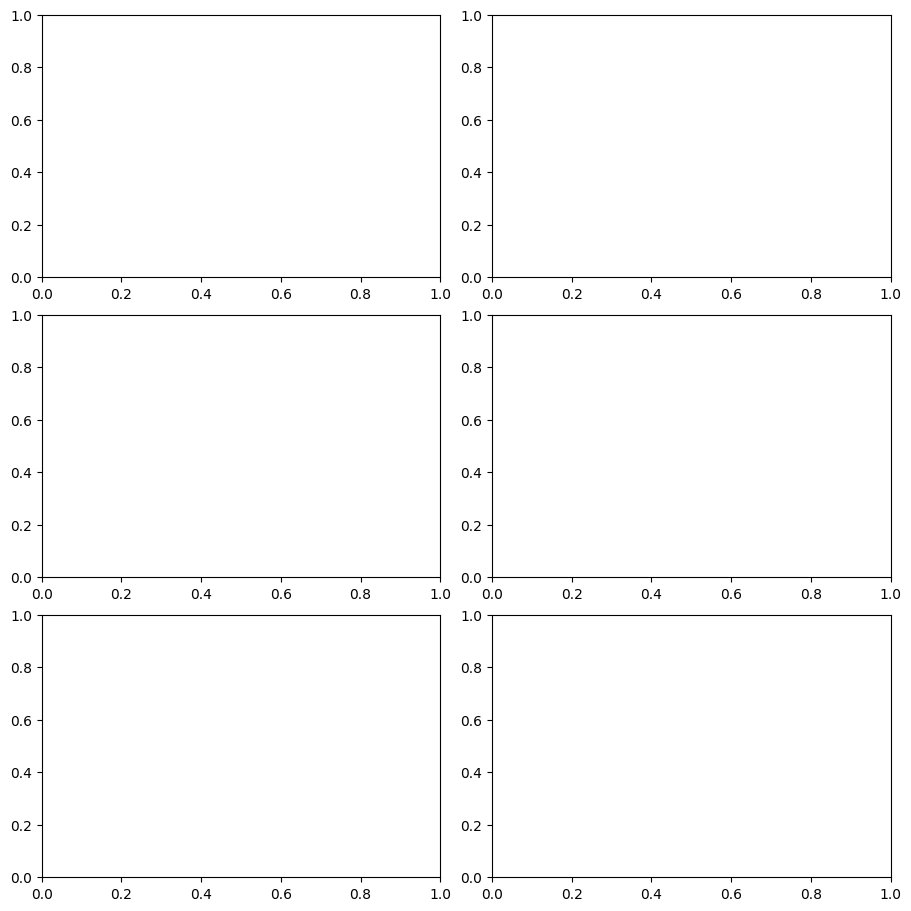

In [404]:
HS250 = sample_instant_helper(sample_df, 1093)

peak = (83.5, 84)
lower_back = (78, 80)
upper_back = (88, 90)
plot_every_other = 8

HS250.peak_integral(peak, lower_back, upper_back, plot_every_other)

x, y, xadj, yadj = HS250._interval_spectral_slice(HS250.scans[0].spectra, (78,80), 1)

print(x)
print(y)

print(len(xadj))
print(len(yadj))

In [ ]:
fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color='black')

threshold = 0.75
ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax.fill_between(x, 0, 1, where=y > threshold,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

In [ ]:
HS250 = sample_instant_helper(sample_df, 1093)
# x = HS250.quick_integral(83, 84, 4, True)
HS250.get_sample_edge()

peak = (83.5, 84)
lower_back = (78, 80)
upper_back = (88, 90)
plot_every_other = 5

HS250.peak_integral(peak, lower_back, upper_back, plot_every_other)

# HS602.get_attr()

# HS602.quick_integral_en((81,85), 0)
# HS602.set_off_sample_scans([0,1,2])
# HS602.set_off_sample_background()
# x = HS602.get_off_sample_background()

# plot, axis = plt.subplots(figsize = (8,5))
# axis.plot(HS602.get_energy(),HS602.get_off_sample_background(), alpha = 0.5)
# axis.plot(HS602.get_energy(), HS602.scans[10].spectra, alpha = 0.5)
# axis.set_ylim(0,200)
# axis.set_xlim(40, 120)


In [ ]:
def sample_instant_helper(df, scannum):
    scan_index = (df[df['ScanNum']==scannum].index.values)[0]
    pos_array = df['Position'][scan_index]
    spectra_set = df['Spectra'][scan_index]
    sampname = df['FullName'][scan_index]
    pH = df['pH'][scan_index]
    time = int(df['Days'][scan_index])
    temper = int(df['Temperature'][scan_index])
    atmosphere = df['Atmosphere'][scan_index]
    st_bool = df['SteelFiber'][scan_index]
    
    sample_edge = 4
    background_scans = [0,1,2]
    slist = []
    
    for q in range(len(pos_array)):
        radius = pos_array[q]
        spectra = spectra_set[q]
        slist.append(scan(spectra, radius))
        
    samp = sample(sampname, slist)
    
    samp.set_ph(pH)
    samp.set_steel_fiber(st_bool)
    samp.set_temp(temper)
    samp.set_atm(atmosphere)
    samp.set_time(time)
    samp.set_sample_edge(sample_edge)
    samp.set_off_sample_scans(background_scans)
    samp.set_off_sample_background()
    
    return samp

In [363]:
class series:
    def __init__(self, sample_list):
        self.list = sample_list
        
    def peak_integral_en(self, limits, index_start):
        fig_list = []
        for q in range(len(self.list)):
            smpl = self.list[q]
            smpl.quick_integral_en(limits, index_start)
            
    def peak_integral_en2(self, limits):
        fig_list = []
        for q in range(len(self.list)):
            smpl = self.list[q]
            smpl.quick_integral_en2(limits)
            
    def peak_integral_mosaic(self, limits, index_start):
        fig_list = []
        for q in range(len(self.list)):
            smpl = self.list[q]
            smpl.quick_integral_en(limits, index_start)
            

In [364]:
HS602 = sample_instant_helper(sample_df, 1091)
HS604 = sample_instant_helper(sample_df, 1092)
HS606 = sample_instant_helper(sample_df, 1083)
HS6014= sample_instant_helper(sample_df, 1087)

HS250 = sample_instant_helper(sample_df, 1093)
HS254 = sample_instant_helper(sample_df, 1094)
HS256 = sample_instant_helper(sample_df, 1089)
HS259 = sample_instant_helper(sample_df, 1088)

HB602 = sample_instant_helper(sample_df, 1105)
HB604 = sample_instant_helper(sample_df, 1104)
HB606 = sample_instant_helper(sample_df, 1103)

HB250 = sample_instant_helper(sample_df, 1108)
HB254 = sample_instant_helper(sample_df, 1107)
HB2514= sample_instant_helper(sample_df, 1106)

LS602 = sample_instant_helper(sample_df, 1096)
LS604 = sample_instant_helper(sample_df, 1095)

LS250 = sample_instant_helper(sample_df, 1102)
LS252 = sample_instant_helper(sample_df, 1101)
LS254 = sample_instant_helper(sample_df, 1100)
LS256 = sample_instant_helper(sample_df, 1097)
LS259 = sample_instant_helper(sample_df, 1098)
LS2514= sample_instant_helper(sample_df, 1099)

high_base_60 = series([HB602,HB604,HB606])
high_steel_60 = series([HS602,HS604,HS606,HS6014])
high_base_25 = series([HB250, HB254, HB2514])
high_steel_25 = series([HS250,HS254,HS256,HS259])

low_steel_60 = series([LS602, LS604])
low_steel_25 = series([LS250, LS252, LS254, LS256, LS259, LS2514])

full_set = series([HB250, HB254, HB2514, HS250,HS254,HS256,HS259, HB602,HB604,HB606, HS602,HS604,HS606,HS6014, 
                   LS250, LS252, LS254, LS256, LS259, LS2514, LS602, LS604]) 

high_steel_60.peak_integral_en2((82.5,88))
# len(low_steel_60.list[0].background_spectra)

# full_set.peak_integral_en((78,88),0)

calc_scan = scan_instant_helper(sample_df, 1071, 0, False)
calcite = sample('Calcite (CaCO3) Reference', [calc_scan]) 

# LS254.get_attr()

# a = HB2514.quick_plot()
# a[1].set_xlim(1200,1400)
# a[1].set_ylim(0,300)

# HB2514.quick_integral((1200,1400),2)
plt.close()

# HS602.quick_integral_en((82,86), 0)

AttributeError: 'sample' object has no attribute 'quick_integral_en2'

In [365]:
s1 = HB2514.custom_stack(i = (28), interval = 10, xlim = (10.5, 7.20))
stackp = HB2514.stack(120)
stackp[1].set_xlim(1000, 1700)
stackp[1].set_ylim(250, 3000)
b = HB2514.quick_integral((1280, 1350), 4)

AttributeError: 'sample' object has no attribute 'custom_stack'

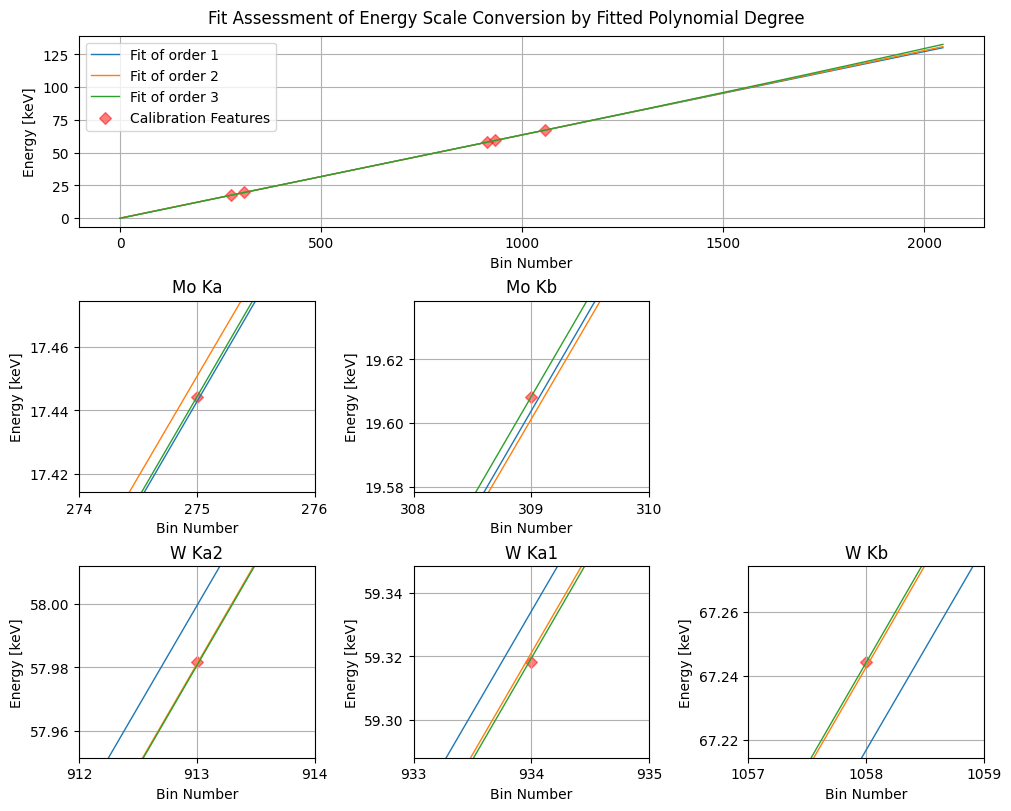

(1, 4)

In [366]:
def energy_bin_linearity(bounds):
    cal_feat_list = [Mo_ka, Mo_kb, W_ka2, W_ka1, W_kb]
    bins = list(range(2048))
    poly_orders = None
    if type(bounds) == int:
        if bounds == 0: poly_orders = (1,2)
        else: poly_orders = (1, abs(bounds) + 1)
    elif type(bounds) == tuple:
        t1, t2 = abs(bounds[0]), abs(bounds[1])
        if type(t1) == int and type(t2)== int:
            if t1 == t2: poly_orders = (t1, t1 + 1)
            elif t1 > t2: poly_orders = (t2, t1 + 1)
            else: poly_orders = (t1, t2 + 1)
        else: return print('Error: Expected int tuple')
    if poly_orders == None:
        return print('Error: Expected int or int tuple')
    
    
    fig = plt.figure(figsize=(10, 8), layout="constrained")
    spec = fig.add_gridspec(3, 3)
    ax0 = fig.add_subplot(spec[0, :])
    
    moka = fig.add_subplot(spec[1, 0], title = 'Mo Ka')
    mokb = fig.add_subplot(spec[1, 1], title = 'Mo Kb')
    
    wka2 = fig.add_subplot(spec[2,0], title = 'W Ka2')
    wka1 = fig.add_subplot(spec[2,1], title = 'W Ka1')
    wkb = fig.add_subplot(spec[2,2], title = 'W Kb')
    
    ax = [ax0, moka, mokb, wka2, wka1, wkb]
    l = len(ax)
    
    fig.suptitle('Fit Assessment of Energy Scale Conversion by Fitted Polynomial Degree')

    for a in range(l):
        ax[a].set_xlabel('Bin Number')
        ax[a].set_ylabel('Energy [keV]')
        ax[a].grid(True)
        
        if a > 0:
            calbin = (cal_feat_list[a-1])[0]
            calen = (cal_feat_list[a-1])[1] / 1000
            ax[a].set_xlim(calbin -1, calbin + 1)
            ax[a].set_ylim(calen - .03, calen + .03)
            ax[a].set_xticks([calbin -1, calbin, calbin +1])


    poly_fit = []
    for n in range(poly_orders[0], poly_orders[1]):
        coeff = np.polyfit([i[0] for i in cal_feat_list], [i[1] for i in cal_feat_list], n)
        energy = poly_function(bins, coeff)
        ax[0].plot(bins, energy, linewidth = 1.0, label = 'Fit of order ' + str(n))
        ax[1].plot(bins, energy, linewidth = 1.0, label = 'Fit of order ' + str(n))
        ax[2].plot(bins, energy, linewidth = 1.0, label = 'Fit of order ' + str(n))
        ax[3].plot(bins, energy, linewidth = 1.0, label = 'Fit of order ' + str(n))
        ax[4].plot(bins, energy, linewidth = 1.0, label = 'Fit of order ' + str(n))
        ax[5].plot(bins, energy, linewidth = 1.0, label = 'Fit of order ' + str(n))

    ax[0].scatter([i[0] for i in cal_feat_list], [i[1]/1000 for i in cal_feat_list], 
               label = 'Calibration Features', color = 'r', marker = 'D', alpha = 0.5)
    ax[1].scatter([i[0] for i in cal_feat_list], [i[1]/1000 for i in cal_feat_list], 
               label = 'Calibration Features', color = 'r', marker = 'D', alpha = 0.5)
    ax[2].scatter([i[0] for i in cal_feat_list], [i[1]/1000 for i in cal_feat_list], 
               label = 'Calibration Features', color = 'r', marker = 'D', alpha = 0.5)
    ax[3].scatter([i[0] for i in cal_feat_list], [i[1]/1000 for i in cal_feat_list], 
               label = 'Calibration Features', color = 'r', marker = 'D', alpha = 0.5)
    ax[4].scatter([i[0] for i in cal_feat_list], [i[1]/1000 for i in cal_feat_list], 
               label = 'Calibration Features', color = 'r', marker = 'D', alpha = 0.5)
    ax[5].scatter([i[0] for i in cal_feat_list], [i[1]/1000 for i in cal_feat_list], 
               label = 'Calibration Features', color = 'r', marker = 'D', alpha = 0.5)
    
    
    
    ax[0].legend()
    plt.show()
    
    return(poly_orders)

energy_bin_linearity(3)